In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import os
import json
import cv2
import numpy as np
import shutil
import matplotlib.pyplot as plt

def add_real_area_to_json_and_filter(
    flat_json_path: str,
    full_json_output_path: str,
    filtered_json_output_path: str,
    image_dir: str,
    filtered_dataset_dir: str,
    threshold_diam_mm: float = 15.0
) -> None:
    """
    Adiciona q_d (diâmetro real em mm) ao JSON usando o círculo envolvente mínimo da máscara binária.
    Copia imagens com diâmetro < threshold_diam_mm para um novo diretório.
    Cria um novo JSON apenas com essas imagens filtradas.

    Conversão: 100 px = 3 mm ⇒ 1 px = 0.03 mm
    """
    with open(flat_json_path, 'r') as f:
        data = json.load(f)

    os.makedirs(filtered_dataset_dir, exist_ok=True)

    px_to_mm = 3.0 / 100.0
    count_above_threshold = 0
    count_copied = 0

    filtered_data = {}

    for name in data:
        image_name = name if name.endswith(".png") else f"{name}.png"
        image_path = os.path.join(image_dir, image_name)

        if not os.path.exists(image_path):
            data[name]["q_d"] = None
            print(f"Imagem não encontrada: {image_path}")
            continue

        # Carregar imagem em escala de cinza e binarizar
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        _, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

        # Encontrar contornos
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            data[name]["q_d"] = None
            print(f"Sem contornos encontrados para {image_name}")
            continue

        # Seleciona o maior contorno
        largest_contour = max(contours, key=cv2.contourArea)

        # Círculo envolvente mínimo
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        diam_px = 2 * radius
        diam_mm = diam_px * px_to_mm

        data[name]["q_d"] = diam_mm

        if diam_mm < threshold_diam_mm:
            # Copiar imagem para o novo diretório
            shutil.copy(image_path, os.path.join(filtered_dataset_dir, image_name))
            # Adicionar ao novo JSON filtrado
            filtered_data[name] = data[name]
            count_copied += 1
        else:
            count_above_threshold += 1

    # Salvar JSON completo com q_d
    with open(full_json_output_path, 'w') as f:
        json.dump(data, f, indent=4)

    # Salvar novo JSON filtrado
    with open(filtered_json_output_path, 'w') as f:
        json.dump(filtered_data, f, indent=4)

    print(f"\n✅ JSON completo salvo em: {full_json_output_path}")
    print(f"✅ JSON filtrado salvo em: {filtered_json_output_path}")
    print(f"📦 Novo dataset com imagens < {threshold_diam_mm} mm em: {filtered_dataset_dir}")
    print(f"📉 Total de imagens removidas (>= {threshold_diam_mm} mm): {count_above_threshold}")
    print(f"📈 Total de imagens filtradas e copiadas: {count_copied}")


In [3]:
add_real_area_to_json_and_filter(
    flat_json_path="new_dataset_contours_aggregate.json",
    full_json_output_path="new_dataset_with_qd.json",
    filtered_json_output_path="new_dataset_filtered_lt15mm.json",
    image_dir="dataset/image_patchs",
    filtered_dataset_dir="images_diam_menor_15mm"
)



✅ JSON completo salvo em: new_dataset_with_qd.json
✅ JSON filtrado salvo em: new_dataset_filtered_lt15mm.json
📦 Novo dataset com imagens < 15.0 mm em: images_diam_menor_15mm
📉 Total de imagens removidas (>= 15.0 mm): 1
📈 Total de imagens filtradas e copiadas: 7038


In [4]:
json_file = "new_dataset_filtered_lt15mm.json"
with open(json_file, 'r') as f:
    contours_data = json.load(f)
    print(f"Extracted contours from {len(contours_data)} patches.")
    
    for image, data in contours_data.items():
        print(f"{image}: q = {data['q']:.4f}, q_d = {data['q_d']:.4f} mm²")


Extracted contours from 7038 patches.
01_0.png: q = 0.0000, q_d = 0.5515 mm²
01_1.png: q = 0.0002, q_d = 1.6778 mm²
01_2.png: q = 0.0002, q_d = 1.9666 mm²
01_3.png: q = 0.0010, q_d = 3.9245 mm²
01_4.png: q = 0.0009, q_d = 3.7196 mm²
01_5.png: q = 0.0002, q_d = 1.5640 mm²
01_7.png: q = 0.0002, q_d = 1.5508 mm²
01_8.png: q = 0.0004, q_d = 2.4159 mm²
01_9.png: q = 0.0026, q_d = 6.2510 mm²
01_10.png: q = 0.0016, q_d = 3.9719 mm²
01_11.png: q = 0.0001, q_d = 1.2241 mm²
01_12.png: q = 0.0001, q_d = 0.9148 mm²
01_13.png: q = 0.0004, q_d = 2.5236 mm²
01_14.png: q = 0.0003, q_d = 1.8976 mm²
01_15.png: q = 0.0008, q_d = 3.3816 mm²
01_16.png: q = 0.0025, q_d = 5.5965 mm²
01_17.png: q = 0.0011, q_d = 5.3630 mm²
01_18.png: q = 0.0016, q_d = 4.6156 mm²
01_19.png: q = 0.0017, q_d = 6.1859 mm²
01_20.png: q = 0.0005, q_d = 2.5351 mm²
01_21.png: q = 0.0001, q_d = 0.9116 mm²
01_22.png: q = 0.0003, q_d = 1.8366 mm²
01_23.png: q = 0.0021, q_d = 5.5210 mm²
01_24.png: q = 0.0001, q_d = 1.3192 mm²
01_25.png: 

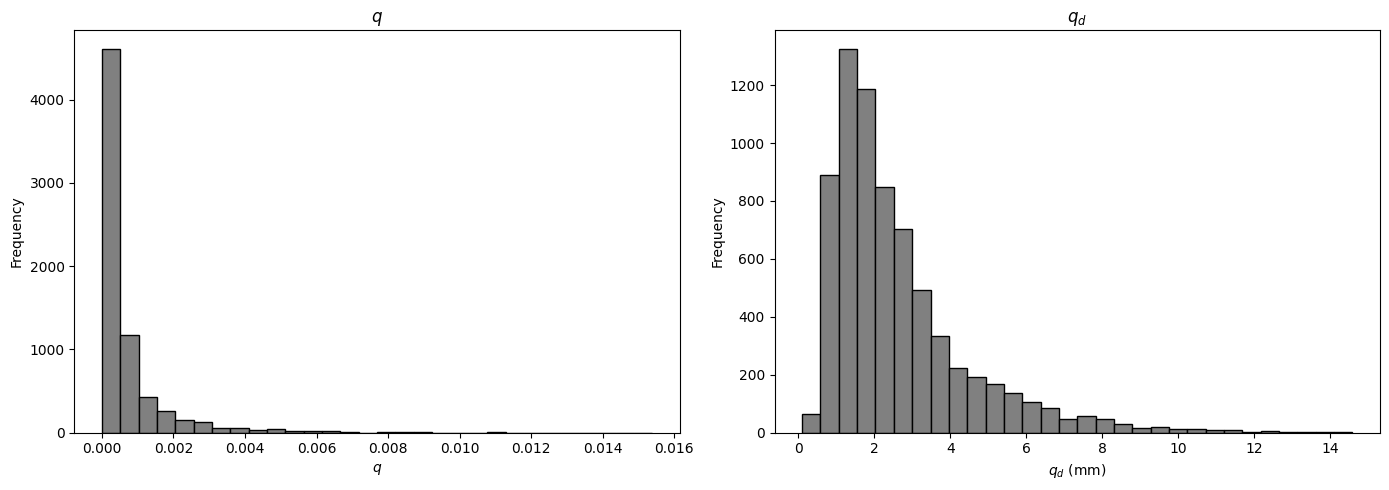

In [7]:
json_file = "new_dataset_filtered_lt15mm.json"

with open(json_file, 'r') as f:
    data = json.load(f)

q_vals = [item["q"] for item in data.values()]
qd_vals = [item["q_d"] for item in data.values()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(q_vals, bins=30, color='gray', edgecolor='black')
axes[0].set_title("$q$") 
axes[0].set_xlabel("$q$")
axes[0].set_ylabel("Frequency")

axes[1].hist(qd_vals, bins=30, color='gray', edgecolor='black')
axes[1].set_title("$q_d$")
axes[1].set_xlabel("$q_d$ (mm)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

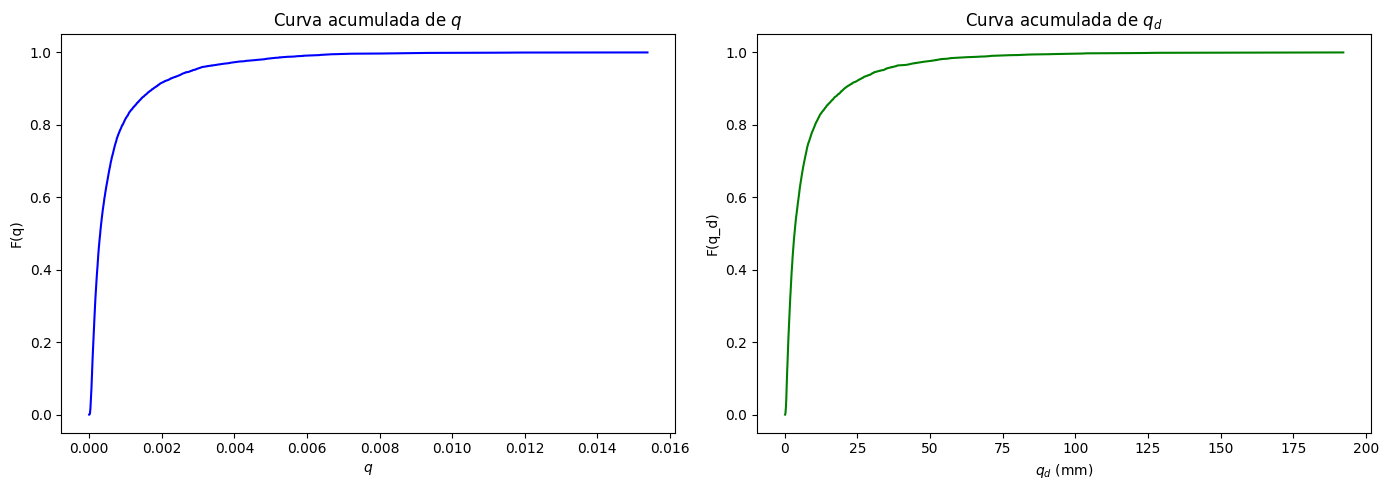

In [13]:
import numpy as np
import json
import matplotlib.pyplot as plt

json_file = "new_dataset_contours_aggregate_qd.json"

with open(json_file, 'r') as f:
    data = json.load(f)

# Obtemos os valores
q_vals = np.array([item["q"] for item in data.values()])
qd_vals = np.array([item["q_d"] for item in data.values()])

# Filtrar valores q_d > 0.05 para eliminar "pontinha"
epsilon = 0.05
qd_vals_filtered = qd_vals[qd_vals > epsilon]

# Ordenar para CDF
q_sorted = np.sort(q_vals)
qd_sorted = np.sort(qd_vals_filtered)
q_cdf = np.arange(1, len(q_sorted) + 1) / len(q_sorted)
qd_cdf = np.arange(1, len(qd_sorted) + 1) / len(qd_sorted)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CDF q
axes[0].plot(q_sorted, q_cdf, color='blue')
axes[0].set_title("Curva acumulada de $q$")
axes[0].set_xlabel("$q$")
axes[0].set_ylabel("F(q)")

# CDF q_d
axes[1].plot(qd_sorted, qd_cdf, color='green')
axes[1].set_title("Curva acumulada de $q_d$")
axes[1].set_xlabel("$q_d$ (mm)")
axes[1].set_ylabel("F(q_d)")

plt.tight_layout()
plt.show()
